In [1]:
include("mfpt.jl")

compare_results (generic function with 1 method)

In [2]:
seed = 1234
tau = 0.25
h = 0.01
k = 1.0
m = 1.0
gamma = 1/100.0
limit = 0.0
nsteps = Int64(1e7)
nsims = 50
q0 = -1.0
p0 = 0.0
qt = copy(limit)
S0 = State(q=q0, p=p0, t=0.0)
C = Cache()
P = Params(seed=seed, tau=tau, h=h, k=k, m=m, gamma=gamma, limit=limit)

Params(0.01, 0.25, 0.01, 1234, 1.0, 1.0, 0.0)

 22.752969 seconds (306.83 M allocations: 6.808 GiB, 50.83% gc time)
PyCall.PyObject

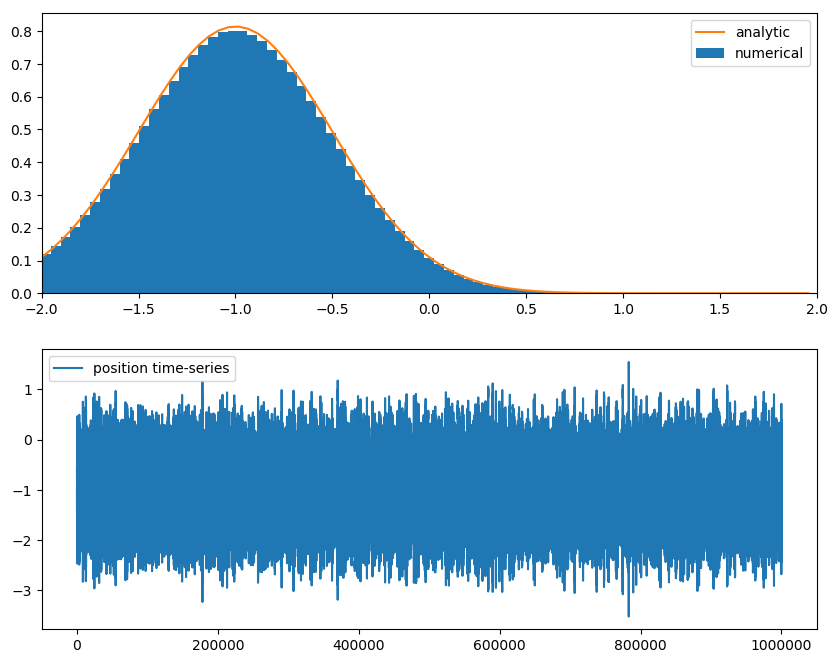

[PyObject <matplotlib.patches.Rectangle object at 0x1633654a8>, PyObject <matplotlib.patches.Rectangle object at 0x15cd95e48>, PyObject <matplotlib.patches.Rectangle object at 0x163365a90>, PyObject <matplotlib.patches.Rectangle object at 0x163365dd8>, PyObject <matplotlib.patches.Rectangle object at 0x163365ef0>, PyObject <matplotlib.patches.Rectangle object at 0x16336b4a8>, PyObject <matplotlib.patches.Rectangle object at 0x16336b7f0>, PyObject <matplotlib.patches.Rectangle object at 0x16336bb38>, PyObject <matplotlib.patches.Rectangle object at 0x16336be80>, PyObject <matplotlib.patches.Rectangle object at 0x16336bf98>, PyObject <matplotlib.patches.Rectangle object at 0x16339f550>, PyObject <matplotlib.patches.Rectangle object at 0x16339f898>, PyObject <matplotlib.patches.Rectangle object at 0x16339fbe0>, PyObject <matplotlib.patches.Rectangle object at 0x16339ff28>, PyObject <matplotlib.patches.Rectangle object at 0x16339ff60>, PyObject <matplotlib.patches.Rectangle object at 0x17b

In [154]:
# @time H = integrator_fix(S0, nsteps; PP=P, CC=C, ut=:baoab!);
@time HH = integrator_fix(S0, Int64(1e8); PP=P, CC=C, ut=:euler!, max_cross=100000);
plot_diagnostics(HH, P, subsample=10)

In [155]:
mean(HH.times)

46.227175979071355

In [156]:
1.0 / mean(HH.times)

0.021632296994580302

In [162]:
P.gamma * tau * 1.0 / (2*pi) * exp(-(V(0.0, k) - V(-1.0, k))/tau)

5.3848198254621585e-5

In [164]:
1.0 / (2*pi*P.gamma) * exp(-(V(0.0, k) - V(-1.0, k))/tau)

2.1539279301848633

In [163]:
1.0 / (2*pi) * exp(-(V(0.0, k) - V(-1.0, k))/tau)

0.021539279301848634

In [161]:
1.0 / mean(H.times)

0.0021132159681370574

In [157]:
@time H = integrator_var(S0, 2; PP=P, CC=C, ut=:euler!);

 11.111657 seconds (151.13 k allocations: 467.516 MiB, 96.12% gc time)


 19.544891 seconds (9.47 M allocations: 22.782 GiB, 41.88% gc time)
PyCall.PyObject

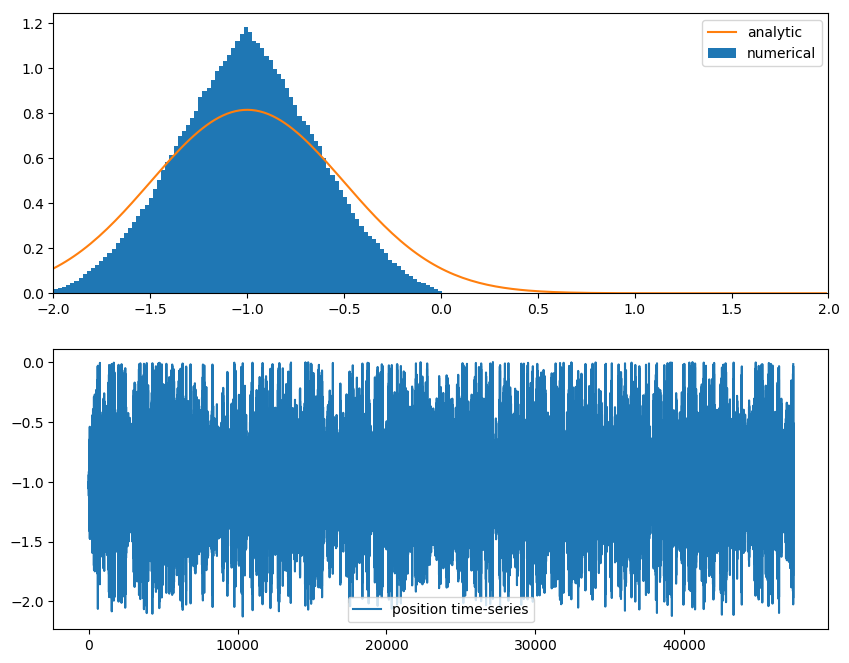

[PyObject <matplotlib.patches.Rectangle object at 0x17be9d0f0>, PyObject <matplotlib.patches.Rectangle object at 0x17be89550>, PyObject <matplotlib.patches.Rectangle object at 0x17be9d668>, PyObject <matplotlib.patches.Rectangle object at 0x17be9de80>, PyObject <matplotlib.patches.Rectangle object at 0x17be9d2b0>, PyObject <matplotlib.patches.Rectangle object at 0x17be9dcc0>, PyObject <matplotlib.patches.Rectangle object at 0x198e0c080>, PyObject <matplotlib.patches.Rectangle object at 0x198e0c630>, PyObject <matplotlib.patches.Rectangle object at 0x198e0cf98>, PyObject <matplotlib.patches.Rectangle object at 0x198e0c710>, PyObject <matplotlib.patches.Rectangle object at 0x1639226d8>, PyObject <matplotlib.patches.Rectangle object at 0x163922978>, PyObject <matplotlib.patches.Rectangle object at 0x163922f60>, PyObject <matplotlib.patches.Rectangle object at 0x163922e10>, PyObject <matplotlib.patches.Rectangle object at 0x198e04208>, PyObject <matplotlib.patches.Rectangle object at 0x198

In [158]:
@time H = integrator_var(S0, 100; PP=P, CC=C, ut=:euler!);
plot_diagnostics(H, P, subsample=10)

In [159]:
mean(H.times)

473.2123999997821

## long chain

> (a)

In [9]:
P.gamma = 0.01
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hsa = Array{Hist}(undef, length(vars))
outsa = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler!, max_cross=Int64(1e5))
    out = compare_results(H, P; S0=S0)
    Hsa[i] = H
    outsa[i] = out
end

Statistics.var: 5.000e-01 ==================================================
  1.870101 seconds (32.62 M allocations: 727.457 MiB, 61.99% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 6474
DNS mean(time to cross) = (crosses / nsteps) / dt    : 6.474e-02

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.545e+01
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.718e+00
exit time ratio DNS/ANA                              : 5.682e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 6.474e-02
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 5.855e+00
exit rate ratio DNS/ANA                              : 1.106e-02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 4.000e-01 =============================================

 13.514795 seconds (301.84 M allocations: 6.734 GiB, 29.92% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 6962
DNS mean(time to cross) = (crosses / nsteps) / dt    : 6.962e-03

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.436e+02
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.276e+01
exit time ratio DNS/ANA                              : 6.310e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 6.963e-03
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 6.993e-01
exit rate ratio DNS/ANA                              : 9.958e-03
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 1.500e-01 ==================================================
 13.682350 seconds (301.45 M allocations: 6.728 GiB, 31.99% gc time)
cro

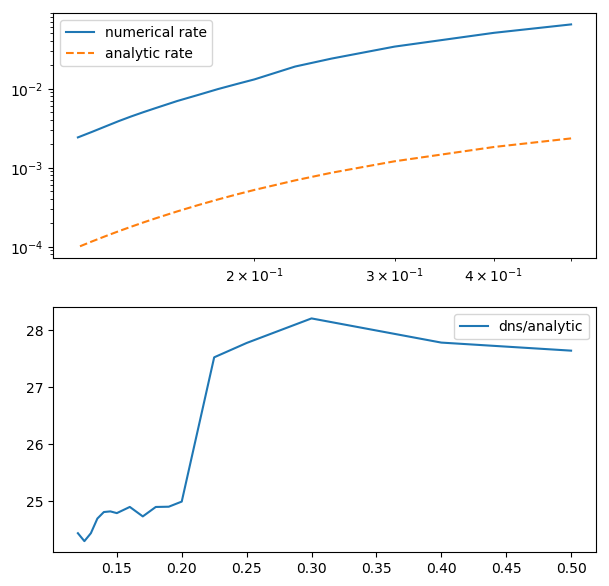

PyObject <matplotlib.legend.Legend object at 0x732b6fda0>

In [15]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outsa[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outsa[i][:lam_ana]*(P.gamma^2/tau) for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outsa[i][:lam_dns] for i = 1:length(vars)]./[outsa[i][:lam_ana]*(P.gamma^2/tau) for i = 1:length(vars)], label="dns/analytic")
legend()

> (b)

In [3]:
P.gamma = 1.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hsb = Array{Hist}(undef, length(vars))
outsb = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler!, max_cross=Int64(1e5))
    out = compare_results(H, P; S0=S0)
    Hsb[i] = H
    outsb[i] = out
end

Statistics.var: 5.000e-01 ==================================================
  1.161963 seconds (32.71 M allocations: 741.536 MiB, 21.76% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 5801
DNS mean(time to cross) = (crosses / nsteps) / dt    : 5.801e-02

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.724e+01
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.718e+00
exit time ratio DNS/ANA                              : 6.341e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 5.802e-02
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 5.855e-02
exit rate ratio DNS/ANA                              : 9.909e-01
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 4.000e-01 =============================================

InterruptException: InterruptException:

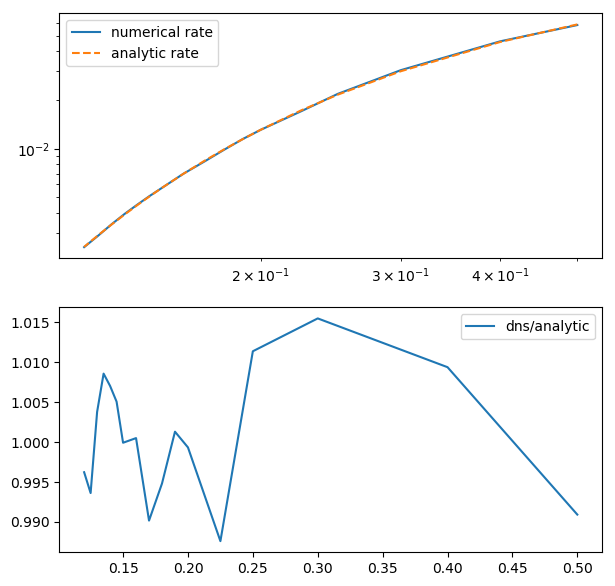

PyObject <matplotlib.legend.Legend object at 0x4616ae748>

In [187]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outsb[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outsb[i][:lam_ana] for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outsb[i][:lam_dns] for i = 1:length(vars)]./[outsb[i][:lam_ana] for i = 1:length(vars)], label="dns/analytic")
legend()

> (c)

In [4]:
P.gamma = 100.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hsc = Array{Hist}(undef, length(vars))
outsc = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler!, max_cross=Int64(1e5))
    out = compare_results(H, P; S0=S0)
    Hsc[i] = H
    outsc[i] = out
end

Statistics.var: 5.000e-01 ==================================================
  0.767430 seconds (32.16 M allocations: 720.413 MiB, 20.71% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 7219
DNS mean(time to cross) = (crosses / nsteps) / dt    : 7.219e-02

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.381e+01
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.718e+00
exit time ratio DNS/ANA                              : 5.081e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 7.240e-02
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 5.855e-04
exit rate ratio DNS/ANA                              : 1.237e+02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 4.000e-01 =============================================

  8.933179 seconds (301.63 M allocations: 6.731 GiB, 5.21% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 8941
DNS mean(time to cross) = (crosses / nsteps) / dt    : 8.941e-03

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.118e+02
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.276e+01
exit time ratio DNS/ANA                              : 4.912e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 8.945e-03
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 6.993e-05
exit rate ratio DNS/ANA                              : 1.279e+02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 1.500e-01 ==================================================
  9.532688 seconds (301.28 M allocations: 6.725 GiB, 4.96% gc time)
cross

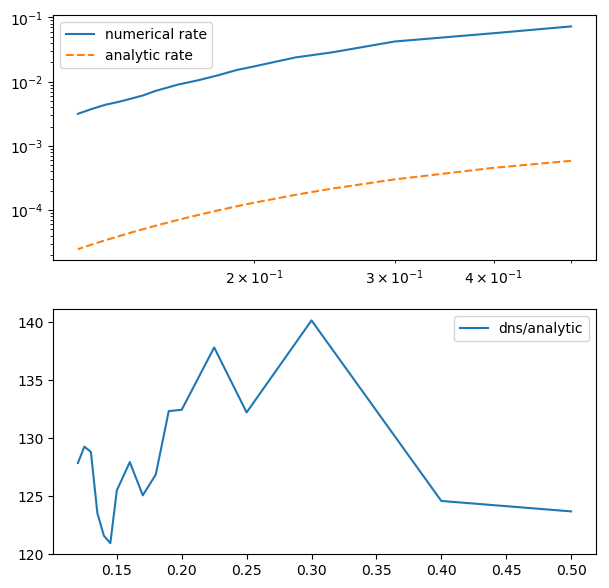

PyObject <matplotlib.legend.Legend object at 0x179298b38>

In [5]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outsc[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outsc[i][:lam_ana] for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outsc[i][:lam_dns] for i = 1:length(vars)]./[outsc[i][:lam_ana] for i = 1:length(vars)], label="dns/analytic")
legend()

## until failure

> (a)

In [17]:
P.gamma = 0.01
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Nfail = 100
HHsa = Array{Hist}(undef, length(vars))
ooutsa = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_var(S0, Nfail; PP=P, CC=C, ut=:euler!)
    out = compare_results(H, P; S0=S0)
    HHsa[i] = H
    ooutsa[i] = out
end

Statistics.var: 5.000e-01 ==================================================
 21.292683 seconds (15.93 M allocations: 22.950 GiB, 36.58% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 100
DNS mean(time to cross) = (crosses / nsteps) / dt    : 5.123e-03

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.952e+02
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.718e+00
exit time ratio DNS/ANA                              : 7.181e+01

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 5.123e-03
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 5.855e+00
exit rate ratio DNS/ANA                              : 8.750e-04
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 4.000e-01 ===============================================

 27.216264 seconds (70.75 M allocations: 24.584 GiB, 27.98% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 100
DNS mean(time to cross) = (crosses / nsteps) / dt    : 7.743e-04

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.291e+03
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.276e+01
exit time ratio DNS/ANA                              : 5.674e+01

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 7.743e-04
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 6.993e-01
exit rate ratio DNS/ANA                              : 1.107e-03
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 1.500e-01 ==================================================
 31.209860 seconds (82.55 M allocations: 25.050 GiB, 32.65% gc time)
cros

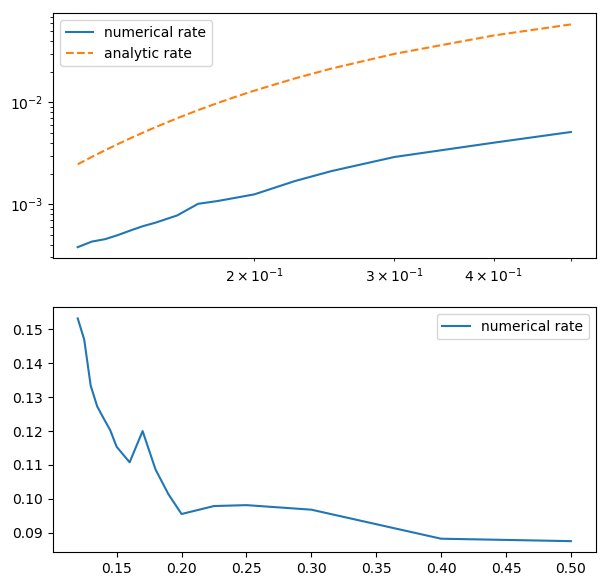

PyObject <matplotlib.legend.Legend object at 0xf646d1400>

In [20]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [ooutsa[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [ooutsa[i][:lam_ana]*(gamma) for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [ooutsa[i][:lam_dns] for i = 1:length(vars)]./[ooutsa[i][:lam_ana]*(gamma) for i = 1:length(vars)], label="numerical rate")
legend()

> (b)

In [ ]:
P.gamma = 1.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Nfail = 100
HHsb = Array{Hist}(undef, length(vars))
ooutsa = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_var(S0, Nfail; PP=P, CC=C, ut=:euler!)
    out = compare_results(H, P; S0=S0)
    HHsb[i] = H
    ooutsb[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [ooutsb[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [ooutsb[i][:lam_ana]*gamma for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [ooutsb[i][:lam_dns] for i = 1:length(vars)]./[ooutsb[i][:lam_ana]*gamma for i = 1:length(vars)], label="numerical rate")
legend()

> (c)

In [6]:
P.gamma = 100.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Nfail = 100
HHsc = Array{Hist}(undef, length(vars))
ooutsc = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_var(S0, Nfail; PP=P, CC=C, ut=:euler!)
    out = compare_results(H, P; S0=S0)
    HHsc[i] = H
    ooutsc[i] = out
end

Statistics.var: 5.000e-01 ==================================================
 15.265595 seconds (21.33 M allocations: 23.094 GiB, 12.89% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 100
DNS mean(time to cross) = (crosses / nsteps) / dt    : 3.098e-03

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 3.228e+02
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.718e+00
exit time ratio DNS/ANA                              : 1.188e+02

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 3.098e-03
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 5.855e-04
exit rate ratio DNS/ANA                              : 5.291e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 4.000e-01 ===============================================

 31.527164 seconds (126.65 M allocations: 26.465 GiB, 22.52% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 100
DNS mean(time to cross) = (crosses / nsteps) / dt    : 4.137e-04

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 2.417e+03
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.276e+01
exit time ratio DNS/ANA                              : 1.062e+02

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 4.137e-04
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 6.993e-05
exit rate ratio DNS/ANA                              : 5.917e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 1.500e-01 ==================================================
 35.252685 seconds (146.77 M allocations: 26.854 GiB, 23.70% gc time)
cr

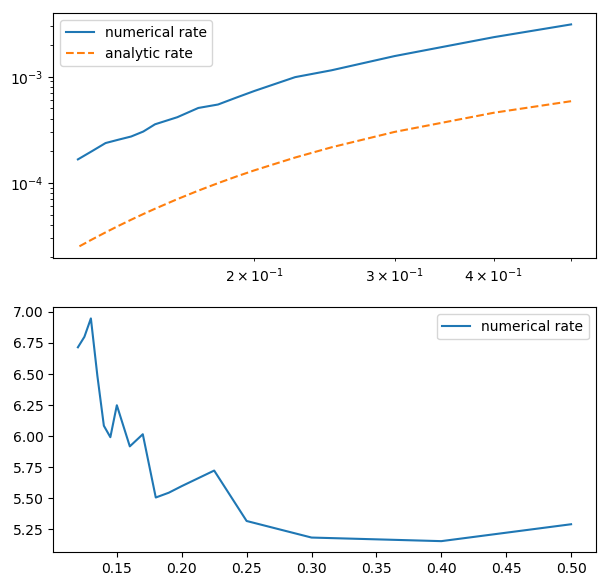

PyObject <matplotlib.legend.Legend object at 0x5e8a1a9e8>

In [7]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [ooutsc[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [ooutsc[i][:lam_ana] for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [ooutsc[i][:lam_dns] for i = 1:length(vars)]./[ooutsc[i][:lam_ana] for i = 1:length(vars)], label="numerical rate")
legend()

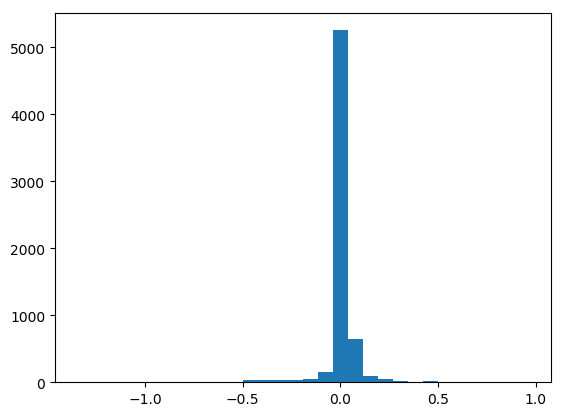

([1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 9.0, 9.0  …  46.0, 20.0, 10.0, 18.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0], [-1.34481, -1.26795, -1.19109, -1.11423, -1.03737, -0.960505, -0.883645, -0.806785, -0.729925, -0.653065  …  0.269255, 0.346115, 0.422975, 0.499835, 0.576695, 0.653555, 0.730415, 0.807275, 0.884135, 0.960995], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x5e8666198>, PyObject <matplotlib.patches.Rectangle object at 0xf8aee3f60>, PyObject <matplotlib.patches.Rectangle object at 0x5e8666780>, PyObject <matplotlib.patches.Rectangle object at 0x5e8666ac8>, PyObject <matplotlib.patches.Rectangle object at 0x5e8666e10>, PyObject <matplotlib.patches.Rectangle object at 0x5e8666f28>, PyObject <matplotlib.patches.Rectangle object at 0xf879cd4e0>, PyObject <matplotlib.patches.Rectangle object at 0xf879cd828>, PyObject <matplotlib.patches.Rectangle object at 0xf879cdb70>, PyObject <matplotlib.patches.Rectangle object at 0xf879cdeb8>  …  PyObject <matplotlib.patches.Re

In [29]:
hist(Hsa[1].phist[Int.(round.(Hsa[1].times./h)).-200], bins=30)

## other...

In [ ]:
include("mfpt.jl")

In [ ]:
vars = [0.5, 0.4, 0.3, 0.25, 0.225]#, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
var = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7]#, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hs = Array{Hist}(undef, length(vars))
outs = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, var, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler2!, max_cross=Int64(1e7))
    out = compare_results(H, P; S0=S0)
    Hs[i] = H
    outs[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outs[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outs[i][:lam_ana] for i = 1:length(vars)], label="analytic rate")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outs[i][:lam_dns] for i = 1:length(vars)]./[2.0*pi*outs[i][:lam_ana] for i = 1:length(vars)], label="numerical rate")
legend()

In [ ]:
plot(Hs[1].qhist[1:100000])

## discretization and noise

In [ ]:
a=-10
b=c=d=1
N = 100000

In [ ]:
sqrt(2.0*tau*h)*(noise==true)

In [ ]:
y0 = 0
v0 = 10
h = 0.001
tau = 0.01
Random.seed!(1234)
noise = true

y = copy(y0)
v = copy(v0)
ys = zeros(N)
for i = 1:N
    z = randn()*sqrt(2.0*tau*h)*(noise==true)
    y += v * h + z
    v += ((a*v^2) / (b*v + c*y + d)) * h
    ys[i] = y
end
plot(ys)

In [ ]:
sqrt(2.0*tau*h)*(noise==true)/h^(0.25)

In [ ]:
y0 = 0.0
y1 = 0.1
y2 = copy(y0)
h = 0.001
tau = 0.01
Random.seed!(1234)
noise = true

y2s = zeros(N)
for i = 1:N
    z = randn()*sqrt(2.0*tau*h)*(noise==true)
    y2 = 2*y1 - y0 + a*h*(y1-y0)^2 / (b*(y1-y0) + c*h*y1 + d*h) + z
    y0 = y1 + z
    y1 = y2 + 0
    y2s[i] = y2
end
plot(y2s)
plot(ys)

In [ ]:
y0 = 0
v0 = 10
h = 0.001
tau = 0.01
Random.seed!(1234)
noise = true

y = copy(y0)
v = copy(v0)
ys = zeros(N)
for i = 1:N
    z = randn()*sqrt(2.0*tau*h)*(noise==true)
    y += v * h 
    v += ((a*v^2) / (b*v + c*y + d)) * h + z
    ys[i] = y
end
# plot(y2s)
plot(ys)

In [ ]:
semilogy(y2s-ys)